# Deep Learning Project

Developed by: Mandy Sack
August 2019


In [1]:
import scipy
import numpy as np
import matplotlib
import pandas as pd
import sklearn
import os
import sys

In [2]:
# import the data
#first, verify you have the files in the correct location
print(os.path.isdir("social_honeypot_icwsm_2011"))
print(os.path.isfile("social_honeypot_icwsm_2011\content_polluters.csv"))
print(os.path.isfile("social_honeypot_icwsm_2011\legitimate_users.csv"))

bDcolnames=['UserID','CreatedAt','CollectedAt', 'NumberOfFollowings', 'NumberOfFollowers', 'NumberOfTweets','LengthOfScreenName','LengthOfDescriptionInUserProfile'] 
badData = pd.read_csv("social_honeypot_icwsm_2011\content_polluters.csv", names=bDcolnames)

nDcolnames=['UserID','CreatedAt','CollectedAt', 'NumberOfFollowings', 'NumberOfFollowers', 'NumberOfTweets','LengthOfScreenName','LengthOfDescriptionInUserProfile']
normalData = pd.read_csv("social_honeypot_icwsm_2011\legitimate_users.csv", names=nDcolnames)

#TODO: make this configurable to enable your own data to be passed in 

True
True
True


In [3]:
print(badData.head(3))
print(normalData.head(3))

   UserID         CreatedAt      CollectedAt  NumberOfFollowings  \
0    6301    9/18/2006 1:07  1/17/2010 20:38                3269   
1   10836  10/27/2006 14:38   6/18/2010 3:35                1949   
2   10997   10/29/2006 9:50   4/24/2010 1:12                1119   

   NumberOfFollowers  NumberOfTweets  LengthOfScreenName  \
0               3071             861                   8   
1                793             226                   9   
2               9644           38674                  12   

   LengthOfDescriptionInUserProfile  
0                               132  
1                               134  
2                               158  
   UserID        CreatedAt       CollectedAt  NumberOfFollowings  \
0     614  7/13/2006 15:30  11/20/2009 23:56                 510   
1    1038  7/15/2006 16:12   11/16/2009 5:12                 304   
2    1437  7/16/2006 12:29  11/16/2009 16:25                  45   

   NumberOfFollowers  NumberOfTweets  LengthOfScreenName  \
0

In [4]:
#insert classification of 0 or 1 based on if good or bad user
#TODO- this does not change accurately once the two datasets are merged
badData.insert(8, "Bad User", 1, True) 
#print(badData.head(3))

normalData.insert(8,"Bad User",0, True)
#print(normalData.head(3))

In [5]:
#set the Collected column to a datetime object 
badData.CollectedAt = pd.to_datetime(badData.CollectedAt)
normalData.CollectedAt = pd.to_datetime(normalData.CollectedAt)

In [6]:
#merge the data together for 1 dataset based on CollectedAt time & save to file
#mergedData = pd.merge_ordered(badData, normalData, fill_method='ffill', on='CollectedAt')
#mergedData = pd.merge_ordered(badData, normalData, fill_method='ffill', left_on='CollectedAt', right_on='CollectedAt')
mergedData = pd.concat([badData,normalData])
mergedData.sort_values(by=['CollectedAt'], inplace=True)
mergedData.to_csv("social_honeypot_icwsm_2011\mergedData.csv")
mergedData

,UserID,CreatedAt,CollectedAt,NumberOfFollowings,NumberOfFollowers,NumberOfTweets,LengthOfScreenName,LengthOfDescriptionInUserProfile,Bad User
7778,34095248,4/21/2009 18:46,2009-11-12 15:43:00,17,74,1242,12,80,0
13259,60545096,7/27/2009 4:16,2009-11-12 15:43:00,228,209,7753,7,126,0
9445,41365980,5/20/2009 9:14,2009-11-12 15:46:00,76,59,156,6,67,0
12771,58027388,7/18/2009 15:44,2009-11-12 15:46:00,172,244,3508,12,0,0
6919,30099427,4/9/2009 18:43,2009-11-12 15:46:00,65,141,8149,6,64,0
98,1039441,3/12/2007 15:30,2009-11-12 15:46:00,597,562,2910,11,79,0
8444,37175817,5/2/2009 5:26,2009-11-12 15:48:00,183,157,935,12,132,0
9409,41224205,5/19/2009 17:07,2009-11-12 15:48:00,29,24,83,15,0,0
16117,76422442,9/22/2009 14:22,2009-11-12 15:49:00,44,11,5,15,0,0
6944,30211671,4/10/2009 8:06,2009-11-12 15:50:00,357,548,9686,13,139,0


In [11]:
#Explore badData dataset seperately
print("badData shape")
print(format(badData.shape))
print("\n")
print("badData NumberOfFollowings describe")
print(badData['NumberOfFollowings'].describe())
print("\n")
print("badData NumberOfFollowers describe")
print(badData['NumberOfFollowers'].describe())
print("\n")
print("badData NumberOfTweets describe")
print(badData['NumberOfTweets'].describe())
print("\n")
print("badData LengthOfScreenName describe")
print(badData['LengthOfScreenName'].describe())
print("\n")
print("badData LengthOfDescriptionInUserProfile describe")
print(badData['LengthOfDescriptionInUserProfile'].describe())

badData shape
(22223, 9)
badData NumberOfFollowings describe
count     22223.000000
mean       2212.416775
std        5376.689112
min           0.000000
25%         326.500000
50%         874.000000
75%        1878.000000
max      109388.000000
Name: NumberOfFollowings, dtype: float64


badData NumberOfFollowers describe
count    2.222300e+04
mean     2.308996e+03
std      3.415880e+04
min      0.000000e+00
25%      6.500000e+01
50%      2.950000e+02
75%      1.224000e+03
max      4.309347e+06
Name: NumberOfFollowers, dtype: float64


badData NumberOfTweets describe
count     22223.000000
mean       1135.044548
std        4301.928411
min           0.000000
25%          16.000000
50%         113.000000
75%         636.000000
max      148047.000000
Name: NumberOfTweets, dtype: float64


badData LengthOfScreenName describe
count    22223.000000
mean        11.283445
std          2.630156
min          2.000000
25%          9.000000
50%         11.000000
75%         13.000000
max         15

In [17]:
#Explore normalData dataset seperately
print("normalData shape")
print(format(normalData.shape))
print("\n")
print("normalDataData NumberOfFollowings describe")
print(normalData['NumberOfFollowings'].describe())
print("\n")
print("normalDataData NumberOfFollowers describe")
print(normalData['NumberOfFollowers'].describe())
print("\n")
print("normalDataData NumberOfTweets describe")
print(normalData['NumberOfTweets'].describe())
print("\n")
print("normalDataData LengthOfScreenName describe")
print(normalData['LengthOfScreenName'].describe())
print("\n")
print("normalDataData LengthOfDescriptionInUserProfile describe")
print(normalData['LengthOfDescriptionInUserProfile'].describe())

normalData shape
(19276, 9)


normalDataData NumberOfFollowings describe
count    19276.000000
mean       327.764163
std       1792.527564
min          0.000000
25%         33.000000
50%         83.000000
75%        197.000000
max      72633.000000
Name: NumberOfFollowings, dtype: float64


normalDataData NumberOfFollowers describe
count     19276.000000
mean        547.024798
std        6654.164342
min           0.000000
25%          30.000000
50%          86.000000
75%         242.000000
max      631329.000000
Name: NumberOfFollowers, dtype: float64


normalDataData NumberOfTweets describe
count     19276.000000
mean       2571.561424
std        6299.568722
min           0.000000
25%         216.000000
50%         836.000000
75%        2579.250000
max      350453.000000
Name: NumberOfTweets, dtype: float64


normalDataData LengthOfScreenName describe
count    19276.000000
mean        10.164713
std          2.773471
min          3.000000
25%          8.000000
50%         10.000000
75%

In [16]:
#Explore mergedData dataset seperately
print("mergedData shape")
print(format(mergedData.shape))
print("\n")
print("mergedData NumberOfFollowings describe")
print(mergedData['NumberOfFollowings'].describe())
print("\n")
print("mergedData NumberOfFollowers describe")
print(mergedData['NumberOfFollowers'].describe())
print("\n")
print("mergedData NumberOfTweets describe")
print(mergedData['NumberOfTweets'].describe())
print("\n")
print("mergedData LengthOfScreenName describe")
print(mergedData['LengthOfScreenName'].describe())
print("\n")
print("mergedData LengthOfDescriptionInUserProfile describe")
print(mergedData['LengthOfDescriptionInUserProfile'].describe())

mergedData shape
(41499, 9)


mergedData NumberOfFollowings describe
count     41499.000000
mean       1337.008603
std        4225.695112
min           0.000000
25%          76.000000
50%         285.000000
75%        1119.000000
max      109388.000000
Name: NumberOfFollowings, dtype: float64


mergedData NumberOfFollowers describe
count    4.149900e+04
mean     1.490572e+03
std      2.541982e+04
min      0.000000e+00
25%      4.000000e+01
50%      1.490000e+02
75%      6.160000e+02
max      4.309347e+06
Name: NumberOfFollowers, dtype: float64


mergedData NumberOfTweets describe
count     41499.000000
mean       1802.296754
std        5371.796703
min           0.000000
25%          49.000000
50%         334.000000
75%        1511.000000
max      350453.000000
Name: NumberOfTweets, dtype: float64


mergedData LengthOfScreenName describe
count    41499.000000
mean        10.763802
std          2.754737
min          2.000000
25%          9.000000
50%         11.000000
75%         13.0000

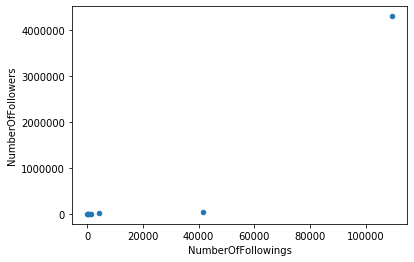

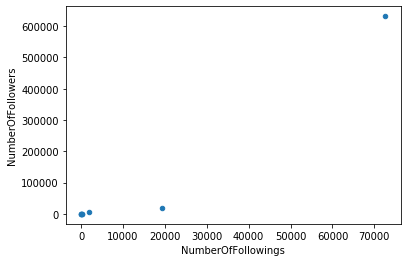

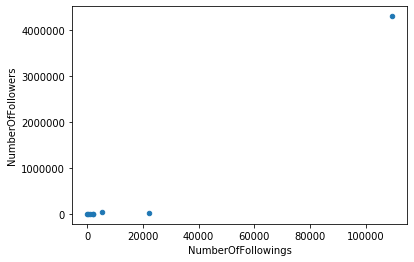

In [15]:
#Let's plot features to determine if anything stands out
plt.title('My title')
mergedData.describe().plot(kind='scatter', x='NumberOfFollowings', y='NumberOfFollowers')
normalData.describe().plot(kind='scatter', x='NumberOfFollowings', y='NumberOfFollowers')
badData.describe().plot(kind='scatter', x='NumberOfFollowings', y='NumberOfFollowers')

In [8]:
print("bad data index")
print(badData.index)

print("badData columns")
print(badData.columns)
#print("badData to numpy")
#print(badData.to_numpy())

print("badData describe")
print(badData.describe())

#print("badData T")
#print(badData.T)


bad data index
RangeIndex(start=0, stop=22223, step=1)
badData columns
Index(['UserID', 'CreatedAt', 'CollectedAt', 'NumberOfFollowings',
       'NumberOfFollowers', 'NumberOfTweets', 'LengthOfScreenName',
       'LengthOfDescriptionInUserProfile', 'Bad User'],
      dtype='object')
badData describe
             UserID  NumberOfFollowings  NumberOfFollowers  NumberOfTweets  \
count  2.222300e+04        22223.000000       2.222300e+04    22223.000000   
mean   9.158609e+07         2212.416775       2.308996e+03     1135.044548   
std    4.236440e+07         5376.689112       3.415880e+04     4301.928411   
min    6.301000e+03            0.000000       0.000000e+00        0.000000   
25%    5.912933e+07          326.500000       6.500000e+01       16.000000   
50%    9.993590e+07          874.000000       2.950000e+02      113.000000   
75%    1.225270e+08         1878.000000       1.224000e+03      636.000000   
max    1.737670e+08       109388.000000       4.309347e+06   148047.000000 